In [12]:
import numpy as np
import pandas as pd
import ann_tensorflow as anntf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

In [2]:
df = pd.read_csv("./fer2013/fer2013/fer2013.csv") #downloaded from kaggle

In [3]:
df.Usage.value_counts() #train and test sets are already split

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

Here we have an imbalanced dataset, and at the moment I couldn't find any explanation for the labels (downloaded them from kaggle but couldn't find a description). I'm gonna plot some images and try to guess what the labels mean. I should try to balance them using either undersampling or an oversampling technique (like SMOTE) or perhaps using data augmentation... but I am not going that far...

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

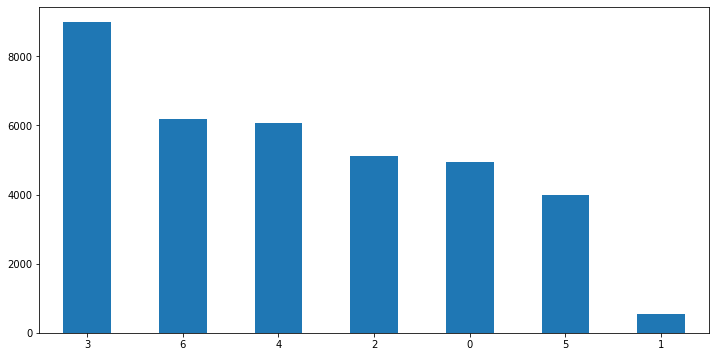

In [4]:
df.emotion.value_counts().plot.bar(figsize=(12,6))
plt.xticks(rotation=0)

In [5]:
#transforming the strings into numpy arrays
df.pixels = df.pixels.apply(lambda x: np.array(x.split()).astype(np.int16))

In [6]:
#getting the image side size in pixels (I know it's a square) -- it's 48 pixels
imageside = int(np.sqrt(df.pixels.loc[0].size))

Wow! I just figured I suck at recognizing facial expressions, I just can't tell really well which emotion is which. Maybe 0 is anger, 4 is sadness, 3 is happy, but 2 and 6? 1 Didn't even appear... probably due to our imabalance problem.  Anyways, it doesn't matter, I just want to test my deep learning skillzzzz ;)

EDIT: Just found out that 2 is fear, 6 is neutral and 1 is disgust -  and I also guessed the other labels correctly, guess I am not so bad after all

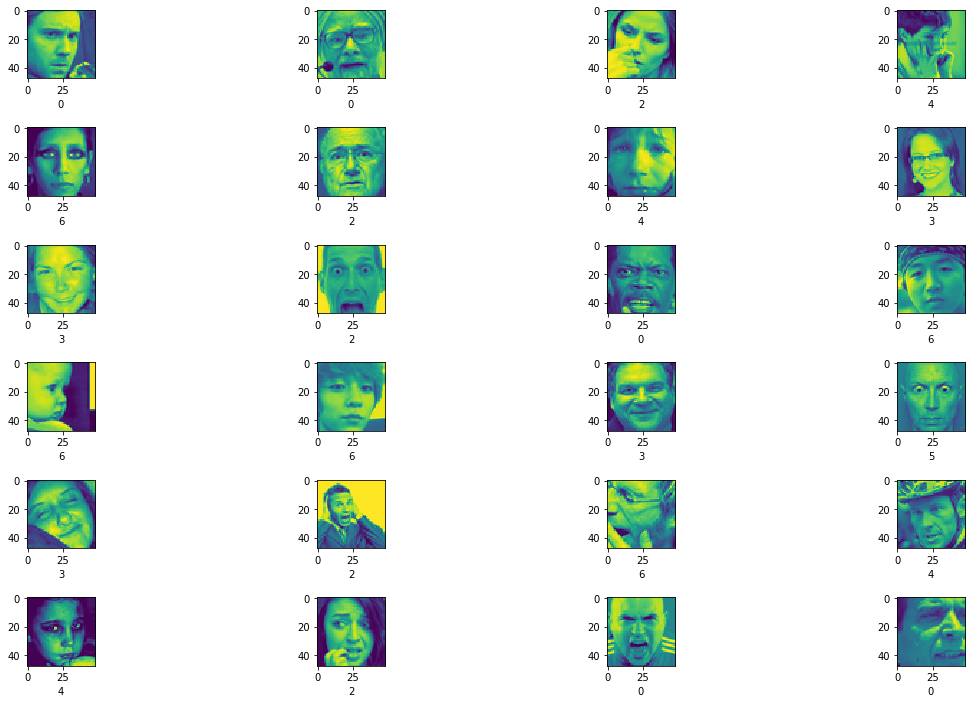

In [7]:
cols = 4
rows = 6
f, axarr = plt.subplots(rows,cols,figsize=(18,10))
for i in range(rows):
    for j in range(cols):
        axarr[i,j].imshow(df.pixels.loc[cols*i+j].reshape(imageside,imageside))
        axarr[i,j].set_xlabel(df.emotion.loc[cols*i+j])

f.tight_layout(pad=1.5)

In [8]:
X_train = np.array(df.query("Usage=='Training'").drop(["Usage","emotion"],axis=1)['pixels'].tolist())#/255.0 
#after I ran some tests, it seemed to work better without normalization - with ReLU activation 
#haven't run exhaustive tests though
y_train = df.query("Usage=='Training'").drop(["Usage","pixels"],axis=1)['emotion'].values
X_test = np.array(df.query("Usage=='PrivateTest'").drop(["Usage","emotion"],axis=1)['pixels'].tolist())#/255.0
#I am just using the privatetest as my test set...
y_test = df.query("Usage=='PrivateTest'").drop(["Usage","pixels"],axis=1)['emotion'].values

In this notebook I am using my ann tensorflow class instead of the numpy one. I am gonna use dropout and batch normalization. I am also using RMSprop with momentum.

In [16]:
nn = anntf.ANNClassifier(hidden_layers_sizes=[1150,600],
                         dropout_rates=[0.8,0.5,0.5], #dropout regularization
                         activation='relu',
                         num_epochs=50,
                         print_epoch=1,
                         learning_rate=1e-5,
                         gd_type='batch',
                         batch_number=10,
                         eps=1e-8, 
                         mu=0.9,
                         decay=0.99,
                         batch_normalization=True,
                         alpha=0.9
                        )
nn.fit(X_train, y_train, X_test, y_test)


epoch: 0 cost: 3.615 accuracy: 0.206 cost_test: 3.520 accuracy_test: 0.212
epoch: 0 cost: 3.487 accuracy: 0.196 cost_test: 3.531 accuracy_test: 0.207
epoch: 0 cost: 3.378 accuracy: 0.139 cost_test: 3.429 accuracy_test: 0.164
epoch: 0 cost: 3.279 accuracy: 0.142 cost_test: 3.283 accuracy_test: 0.159
epoch: 0 cost: 3.234 accuracy: 0.184 cost_test: 3.259 accuracy_test: 0.194
epoch: 0 cost: 3.166 accuracy: 0.220 cost_test: 3.176 accuracy_test: 0.226
epoch: 0 cost: 3.110 accuracy: 0.291 cost_test: 3.143 accuracy_test: 0.291
epoch: 0 cost: 3.076 accuracy: 0.283 cost_test: 3.073 accuracy_test: 0.281
epoch: 0 cost: 3.041 accuracy: 0.276 cost_test: 3.044 accuracy_test: 0.270
epoch: 0 cost: 3.001 accuracy: 0.277 cost_test: 3.032 accuracy_test: 0.270
epoch: 1 cost: 2.973 accuracy: 0.198 cost_test: 2.925 accuracy_test: 0.211
epoch: 1 cost: 2.966 accuracy: 0.199 cost_test: 2.986 accuracy_test: 0.208
epoch: 1 cost: 2.937 accuracy: 0.204 cost_test: 2.901 accuracy_test: 0.211
epoch: 1 cost: 2.916 acc

epoch: 10 cost: 2.526 accuracy: 0.385 cost_test: 2.576 accuracy_test: 0.369
epoch: 10 cost: 2.512 accuracy: 0.382 cost_test: 2.608 accuracy_test: 0.361
epoch: 10 cost: 2.502 accuracy: 0.381 cost_test: 2.549 accuracy_test: 0.357
epoch: 11 cost: 2.504 accuracy: 0.383 cost_test: 2.585 accuracy_test: 0.361
epoch: 11 cost: 2.512 accuracy: 0.386 cost_test: 2.563 accuracy_test: 0.366
epoch: 11 cost: 2.523 accuracy: 0.386 cost_test: 2.548 accuracy_test: 0.369
epoch: 11 cost: 2.509 accuracy: 0.383 cost_test: 2.527 accuracy_test: 0.366
epoch: 11 cost: 2.502 accuracy: 0.372 cost_test: 2.547 accuracy_test: 0.358
epoch: 11 cost: 2.503 accuracy: 0.364 cost_test: 2.549 accuracy_test: 0.353
epoch: 11 cost: 2.503 accuracy: 0.362 cost_test: 2.551 accuracy_test: 0.347
epoch: 11 cost: 2.482 accuracy: 0.367 cost_test: 2.596 accuracy_test: 0.347
epoch: 11 cost: 2.506 accuracy: 0.383 cost_test: 2.584 accuracy_test: 0.358
epoch: 11 cost: 2.489 accuracy: 0.397 cost_test: 2.547 accuracy_test: 0.362
epoch: 12 co

epoch: 21 cost: 2.335 accuracy: 0.418 cost_test: 2.396 accuracy_test: 0.391
epoch: 21 cost: 2.327 accuracy: 0.415 cost_test: 2.404 accuracy_test: 0.391
epoch: 21 cost: 2.327 accuracy: 0.416 cost_test: 2.390 accuracy_test: 0.389
epoch: 21 cost: 2.320 accuracy: 0.415 cost_test: 2.360 accuracy_test: 0.386
epoch: 21 cost: 2.346 accuracy: 0.412 cost_test: 2.365 accuracy_test: 0.378
epoch: 22 cost: 2.348 accuracy: 0.407 cost_test: 2.360 accuracy_test: 0.375
epoch: 22 cost: 2.328 accuracy: 0.403 cost_test: 2.406 accuracy_test: 0.372
epoch: 22 cost: 2.303 accuracy: 0.402 cost_test: 2.398 accuracy_test: 0.372
epoch: 22 cost: 2.340 accuracy: 0.401 cost_test: 2.384 accuracy_test: 0.376
epoch: 22 cost: 2.323 accuracy: 0.405 cost_test: 2.384 accuracy_test: 0.376
epoch: 22 cost: 2.335 accuracy: 0.411 cost_test: 2.466 accuracy_test: 0.374
epoch: 22 cost: 2.317 accuracy: 0.408 cost_test: 2.400 accuracy_test: 0.373
epoch: 22 cost: 2.320 accuracy: 0.401 cost_test: 2.405 accuracy_test: 0.368
epoch: 22 co

epoch: 32 cost: 2.196 accuracy: 0.443 cost_test: 2.290 accuracy_test: 0.403
epoch: 32 cost: 2.184 accuracy: 0.442 cost_test: 2.251 accuracy_test: 0.404
epoch: 32 cost: 2.193 accuracy: 0.441 cost_test: 2.262 accuracy_test: 0.404
epoch: 32 cost: 2.175 accuracy: 0.443 cost_test: 2.257 accuracy_test: 0.401
epoch: 32 cost: 2.179 accuracy: 0.441 cost_test: 2.302 accuracy_test: 0.398
epoch: 32 cost: 2.179 accuracy: 0.435 cost_test: 2.222 accuracy_test: 0.395
epoch: 32 cost: 2.171 accuracy: 0.428 cost_test: 2.236 accuracy_test: 0.393
epoch: 33 cost: 2.184 accuracy: 0.429 cost_test: 2.260 accuracy_test: 0.395
epoch: 33 cost: 2.182 accuracy: 0.437 cost_test: 2.247 accuracy_test: 0.400
epoch: 33 cost: 2.172 accuracy: 0.444 cost_test: 2.242 accuracy_test: 0.404
epoch: 33 cost: 2.172 accuracy: 0.446 cost_test: 2.256 accuracy_test: 0.406
epoch: 33 cost: 2.156 accuracy: 0.446 cost_test: 2.251 accuracy_test: 0.405
epoch: 33 cost: 2.185 accuracy: 0.437 cost_test: 2.223 accuracy_test: 0.398
epoch: 33 co

epoch: 43 cost: 2.062 accuracy: 0.448 cost_test: 2.174 accuracy_test: 0.403
epoch: 43 cost: 2.075 accuracy: 0.458 cost_test: 2.158 accuracy_test: 0.408
epoch: 43 cost: 2.051 accuracy: 0.461 cost_test: 2.138 accuracy_test: 0.408
epoch: 43 cost: 2.060 accuracy: 0.453 cost_test: 2.144 accuracy_test: 0.405
epoch: 43 cost: 2.057 accuracy: 0.439 cost_test: 2.171 accuracy_test: 0.390
epoch: 43 cost: 2.063 accuracy: 0.426 cost_test: 2.142 accuracy_test: 0.385
epoch: 43 cost: 2.062 accuracy: 0.426 cost_test: 2.200 accuracy_test: 0.385
epoch: 43 cost: 2.070 accuracy: 0.438 cost_test: 2.110 accuracy_test: 0.396
epoch: 43 cost: 2.046 accuracy: 0.447 cost_test: 2.143 accuracy_test: 0.405
epoch: 44 cost: 2.047 accuracy: 0.446 cost_test: 2.182 accuracy_test: 0.403
epoch: 44 cost: 2.049 accuracy: 0.429 cost_test: 2.116 accuracy_test: 0.391
epoch: 44 cost: 2.043 accuracy: 0.420 cost_test: 2.133 accuracy_test: 0.377
epoch: 44 cost: 2.052 accuracy: 0.429 cost_test: 2.145 accuracy_test: 0.386
epoch: 44 co

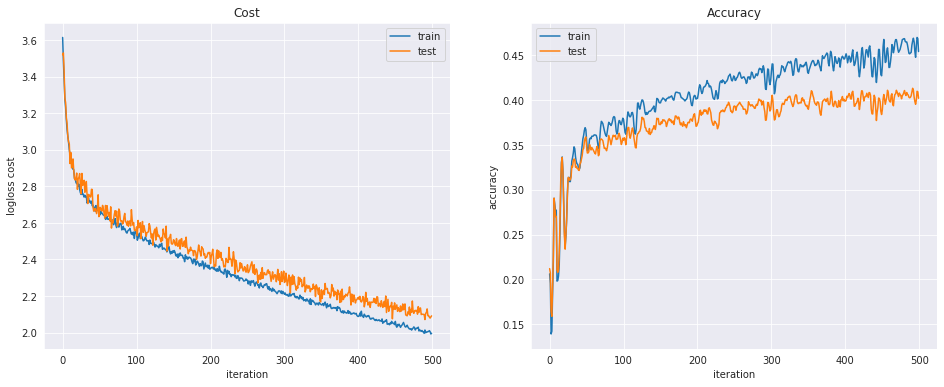

In [17]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

#logloss
ax1.plot(list(range(len(nn.costs))),nn.costs)
ax1.plot(nn.costs_test)
ax1.set_title('Cost')
ax1.legend(['train','test'])
ax1.set_ylabel('logloss cost')
ax1.set_xlabel('iteration')

#accuracy
ax2.plot(nn.clf_rates)
ax2.plot(nn.clf_rates_test)
ax2.legend(['train','test'])
ax2.set_title('Accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('iteration')
plt.show()

It looks a like better than the results in the other notebook. Still haven't trained to the end.